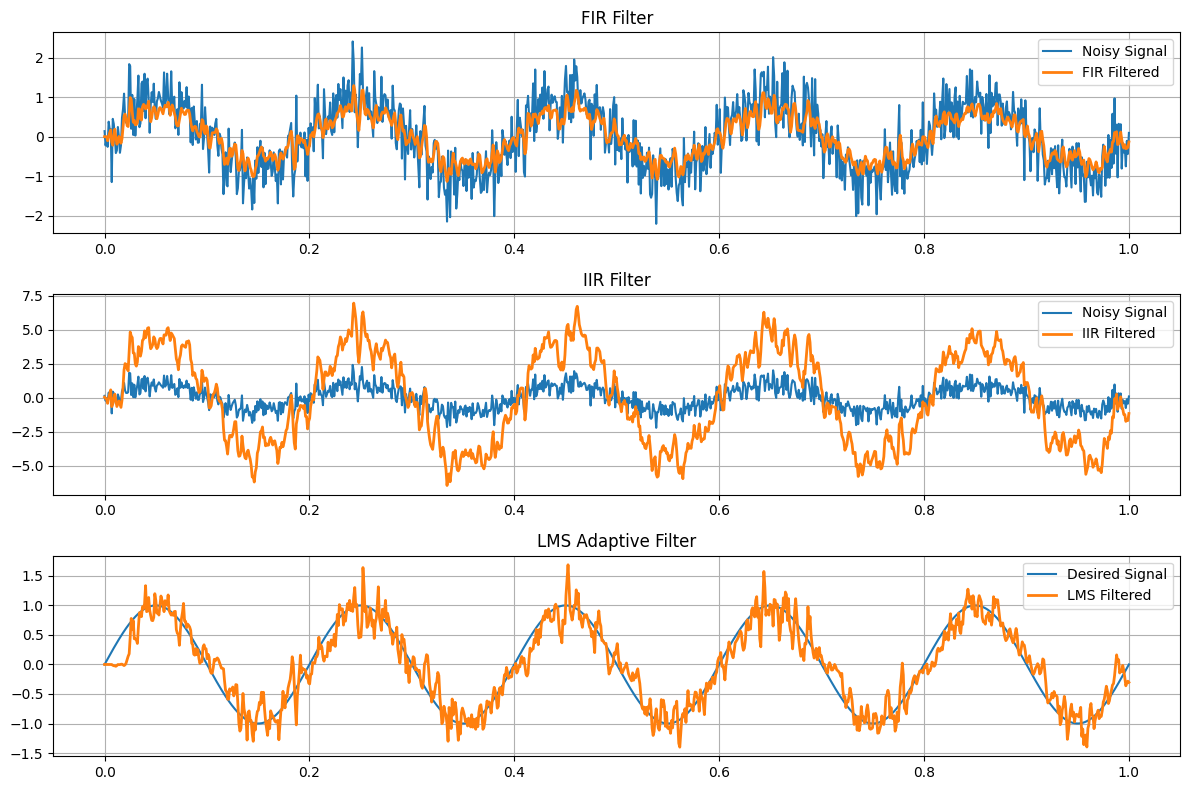

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def fir_filter(x, b):
    """FIR filter implementation."""
    M = len(b)
    y = np.zeros(len(x))
    for n in range(M, len(x)):
        y[n] = np.dot(b, x[n-M+1:n+1][::-1])
    return y

def iir_filter(x, b, a):
    """IIR filter implementation."""
    M = len(b)
    N = len(a)
    y = np.zeros(len(x))
    
    for n in range(len(x)):
        x_segment = x[max(0, n-M+1):n+1][::-1]
        b_truncated = b[-len(x_segment):]  # Dopasowanie długości
        y[n] = np.dot(b_truncated, x_segment)

        if n > 0:
            y_segment = y[max(0, n-N+1):n][::-1]
            a_truncated = a[1:][-len(y_segment):]
            y[n] -= np.dot(a_truncated, y_segment)
    
    return y

def lms_filter(x, d, mu, num_taps):
    """LMS adaptive filter implementation."""
    n = len(x)
    w = np.zeros(num_taps)
    y = np.zeros(n)
    e = np.zeros(n)
    for i in range(num_taps, n):
        x_segment = x[i-num_taps:i][::-1]
        y[i] = np.dot(w, x_segment)
        e[i] = d[i] - y[i]
        w += mu * e[i] * x_segment
    return y, e, w

# Dane wejściowe
ts = 1.0 / 1000
t = np.linspace(0, 1, 1000)
x = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.randn(len(t))
d = np.sin(2 * np.pi * 5 * t)

# FIR Filter
b_fir = [0.2, 0.3, 0.2]
y_fir = fir_filter(x, b_fir)

# IIR Filter
b_iir = [1, 0.5, 0.3]
a_iir = [1, -0.6]
y_iir = iir_filter(x, b_iir, a_iir)

# LMS Filter
mu = 0.1
num_taps = 4
y_lms, e_lms, w_lms = lms_filter(x, d, mu, num_taps)

# Wykresy
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, x, label='Noisy Signal')
plt.plot(t, y_fir, label='FIR Filtered', linewidth=2)
plt.legend()
plt.title("FIR Filter")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t, x, label='Noisy Signal')
plt.plot(t, y_iir, label='IIR Filtered', linewidth=2)
plt.legend()
plt.title("IIR Filter")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t, d, label='Desired Signal')
plt.plot(t, y_lms, label='LMS Filtered', linewidth=2)
plt.legend()
plt.title("LMS Adaptive Filter")
plt.grid()

plt.tight_layout()
plt.show()
